In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy 
import seaborn as sns 
from IPython.display import display
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
%matplotlib inline 

df = plt.style.use('seaborn-whitegrid')

<ipython-input-2-f83679bc0f49>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  df = plt.style.use('seaborn-whitegrid')


In [3]:
data = pd.read_csv('AirPassengers-1.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
print(type(data))

print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(144, 2)


In [5]:
print(data.isnull().sum())

Month          0
#Passengers    0
dtype: int64


In [6]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace = True)

In [7]:
data.rename(columns={"#Passengers": "Passengers"}, inplace=True)

In [8]:
RpMean = data['Passengers'].rolling(window=12).mean()
RpVariance = data['Passengers'].rolling(window=12).var()

In [10]:
data['Rolling Mean'] = RpMean
data['Rolling Variance'] = RpVariance

In [11]:
display(data)

,Passengers,Rolling Mean,Rolling Variance
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
...,...,...,...
1960-08-01,606,463.333333,6994.060606
1960-09-01,508,467.083333,7160.083333
1960-10-01,461,471.583333,6813.174242


In [12]:
data.head(15)

,Passengers,Rolling Mean,Rolling Variance
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,NaN,NaN
1949-07-01,148,NaN,NaN
1949-08-01,148,NaN,NaN
1949-09-01,136,NaN,NaN


In [13]:
data.tail(5)

,Passengers,Rolling Mean,Rolling Variance
Month,,,
1960-08-01,606,463.333333,6994.060606
1960-09-01,508,467.083333,7160.083333
1960-10-01,461,471.583333,6813.174242
1960-11-01,390,473.916667,6320.628788
1960-12-01,432,476.166667,6043.060606


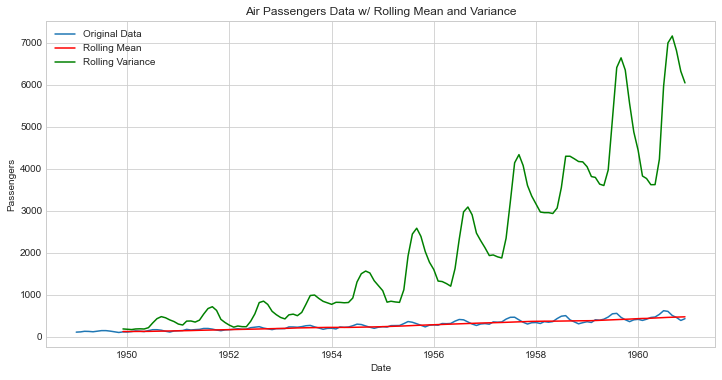

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label='Original Data')
plt.plot(data['Rolling Mean'], color='red', label='Rolling Mean')
plt.plot(data['Rolling Variance'], color='green', label='Rolling Variance')
plt.legend()
plt.title('Air Passengers Data w/ Rolling Mean and Variance')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

In [17]:
# transformation
TransformationData = np.log(data['Passengers'])

In [18]:
# first-order difference
LogDiffData = TransformationData.diff().dropna()

In [19]:
# checking stationarity w/ ADF on transformed data
ADFtest = adfuller(LogDiffData)

In [20]:
ADFtest

(-2.717130598388129,
 0.07112054815085944,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

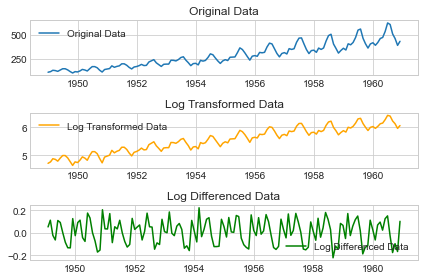

In [21]:
# Original data 
plt.subplot(3, 1, 1)
plt.plot(data['Passengers'], label='Original Data')
plt.title('Original Data')
plt.legend()

# Log transformed data 
plt.subplot(3, 1, 2)
plt.plot(TransformationData, label='Log Transformed Data', color='orange')
plt.title('Log Transformed Data')
plt.legend()

# Log differenced data 
plt.subplot(3, 1, 3)
plt.plot(LogDiffData, label='Log Differenced Data', color='green')
plt.title('Log Differenced Data')
plt.legend()

plt.tight_layout()
plt.show()




In [22]:
# ARIMA model (initial parameters: p=1, d=1, q=1) 

ARIMAmodel = sm.tsa.ARIMA(TransformationData, order=(1, 1, 1))
ARIMAresult = ARIMAmodel.fit()

# Display a summary of the model fit
ARIMAresult.summary()

/Users/bruker/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bruker/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bruker/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 124.313
Date:                Sun, 10 Nov 2024   AIC                           -242.626
Time:                        13:53:58   BIC                           -233.738
Sample:                    01-01-1949   HQIC                          -239.014
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5774      0.164     -3.517      0.000      -0.899      -0.256
ma.L1          0.8478      0.098      8.687      0.000       0.657       1.039
sigma2         0.0103      0.002      5.992      0.000       0.007       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.94
Prob(Q):                              0.90   Prob(JB):                         0.05
Heteroskedasticity (H):               1.07   Skew:                             0.04
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/bruker/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


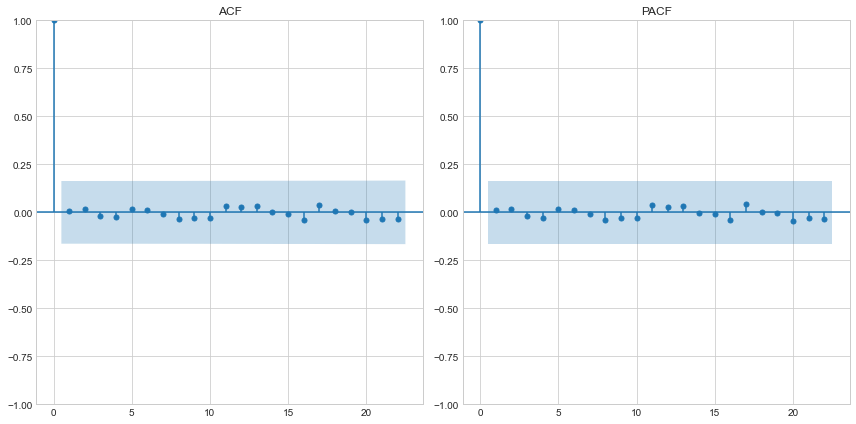

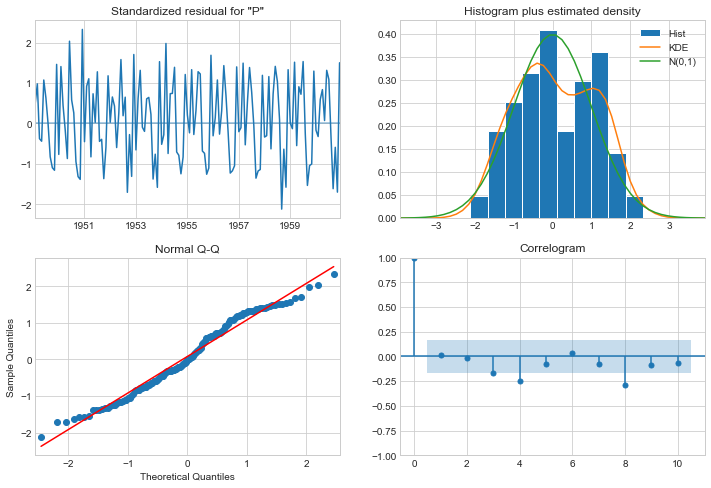

In [23]:

Residuals = ARIMAresult.resid

plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(Residuals, ax=plt.gca(), title='ACF')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(Residuals, ax=plt.gca(), title='PACF')

plt.tight_layout()
plt.show()

# Diagnostic plots
ARIMAresult.plot_diagnostics(figsize=(12, 8))
plt.show()